<h1 align="center">Sentiment Analysis Project </h1> 

In [1]:
import itertools
import string
import warnings
import re
import spacy
import nltk
import itertools
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
french_stops = stopwords.words("french")
nlp_fr = spacy.load("fr")

In [6]:
df = pd.read_csv("../Dataset_directory/fr_sentiment_100k.csv", sep='|')
text = df['text'].apply(lambda x : x[2:-2])
y = df['polarity']
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size = 0.33, random_state = 123)

# Bag of words

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<214185x70056 sparse matrix of type '<class 'numpy.int64'>'
	with 2679485 stored elements in Compressed Sparse Row format>


In [5]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features :\n{}\n".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}\n".format(feature_names[20010:20030]))
print("Every 2000th feature :\n{}".format(feature_names[::3000]))

Number of features: 81615

First 20 features :
['00', '000', '0000', '000e', '000kg', '000webhost', '001', '003', '0047', '006', '007', '007peter', '00a', '00pm', '01', '010', '01253', '01614948343', '01am', '01h13']

Features 20010 to 20030:
['darn', 'darnais', 'darnit', 'darnnit', 'darns', 'daron', 'darrastao', 'darrell', 'darren', 'darrenrowse', 'darrk', 'darryl', 'darth', 'dartington', 'darude', 'darvocet', 'darwin', 'daryl', 'daryll41', 'das']

Every 2000th feature :
['00', 'aarrgghh', 'antler', 'barre', 'britannique', 'chesapeake', 'copié', 'dictées', 'détestons', 'faerie', 'g8t', 'hahahahahahahahaha', 'ihafta', 'jobs', 'legger', 'maroquinerie', 'muak', 'occulter', 'pergi', 'prydz', 'renom', 'saliver', 'sleeve', 'sumo', 'tkam', 'uf8ff', 'whatevs', 'énigme']


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
scores = cross_val_score(logistic_regression, X_train, y_train, cv=5)
print("Mean cross validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross validation accuracy: 0.77


In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(logistic_regression, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.77
Best parameters:  {'C': 0.1}


In [8]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.78


In [9]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <214185x18169 sparse matrix of type '<class 'numpy.int64'>'
	with 2566333 stored elements in Compressed Sparse Row format>


In [10]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features :\n{}\n".format(feature_names[:20]))
print("Features 10010 to 10030:\n{}\n".format(feature_names[10010:10030]))
print("Every 1000th feature :\n{}".format(feature_names[::1000]))

Number of features: 18169

First 20 features :
['00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '10000', '1000e', '100e', '100ème', '101', '102']

Features 10010 to 10030:
['matins', 'matinée', 'matinées', 'matière', 'matières', 'matrice', 'matt', 'matthew', 'matthews', 'matty', 'mature', 'maturité', 'matériaux', 'matériel', 'mau', 'maudire', 'maudit', 'maui', 'maureen', 'mauvais']

Every 1000th feature :
['00', 'amuses', 'beurre', 'challenge', 'coquille', 'done', 'espanol', 'g1', 'http', 'kent', 'maternelle', 'nombres', 'personnages', 'puissent', 'roy', 'soho', 'tf2', 'verrez', 'épicées']


In [11]:
grid = GridSearchCV(logistic_regression, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.77
Best parameters:  {'C': 0.1}


In [12]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.78


# Stop words

In [13]:
print("Number of stop words: {}\n".format(len(french_stops)))
print("List of stop words:\n{}".format(french_stops))

Number of stop words: 155

List of stop words:
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai'

In [14]:
vect = CountVectorizer(min_df=5, stop_words=french_stops).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<214185x18052 sparse matrix of type '<class 'numpy.int64'>'
	with 1562660 stored elements in Compressed Sparse Row format>


# Tf-idf Vectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None), LogisticRegression())
param_grid = {'logisticregression__C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.77


In [34]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print("Feature with lowest tfidf:\n{}\n".format(feature_names[sorted_by_tfidf[:20]]))
print("Feature with highest tfidf:\n{}".format(feature_names[sorted_by_tfidf[-20:]]))

Feature with lowest tfidf:
['rentrer' 'essayant' 'awww' 'null' 'également' 'ait' 'arrivé' 'serais'
 'pensez' 'retourner' 'soupir' 'passez' 'suffit' 'apparemment' 'rendu'
 'arriver' 'profiter' 'certain' 'finir' 'intéressant']

Feature with highest tfidf:
['ty' 'magasins' 'beaucoup' 'bande' 'harry' 'blah' 'potter' 'merde' 'na'
 'amp' 'jour' 'chat' 'examens' 'day' 'bob' 'wahoo' 'tellement' 'sainte'
 'butt' 'gt']


In [36]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}\n".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['je' 'de' 'le' 'est' 'pas' 'la' 'que' 'et' 'un' 'ne' 'vous' 'pour' 'ai'
 'les' 'en' 'une' 'ce' 'mon' 'suis' 'il' 'me' 'mais' 'des' 'sur' 'dans'
 'avec' 'au' 'plus' 'du' 'si' 'être' 'maintenant' 'bien' 'ma' 'moi'
 'faire' 'tout' 'nous' 'qu' 'hui' 'aujourd' 'fait' 'ça' 'se' 'tellement'
 'mes' 'qui' 'peux' 'était' 'vraiment' 'lol' 'merci' 'vais' 'tu' 'aime'
 'aussi' 'avoir' 'jour' 'travail' 'aller' 'juste' 'été' 'veux' 'bon'
 'comme' 'votre' 'temps' 'sont' 'encore' 'maison' 'peut' 'ils' 'va'
 'journée' 'bonne' 'avez' 'oh' 'pense' 'oui' 'toujours' 'eu' 'nuit' 'voir'
 'tous' 'cette' 'alors' 'amp' 'demain' 'soir' 'elle' 'très' 'beaucoup'
 'cela' 'espère' 'twitter' 'besoin' 'même' 'quand' 'ou' 'ici']



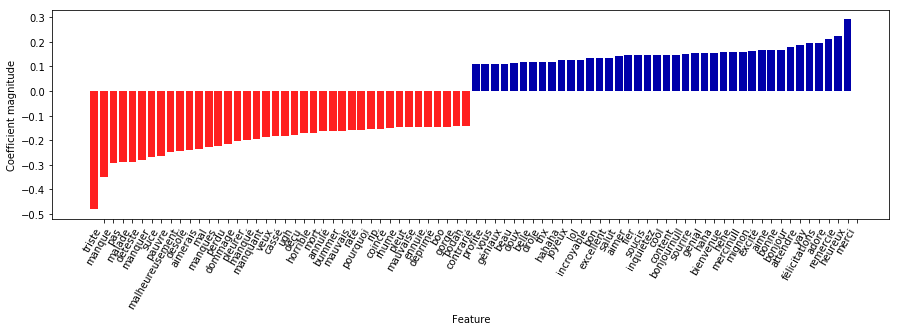

In [38]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_,
                                     feature_names, n_top_features=40)

In [40]:
pipe = make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression())

param_grid = {"logisticregression__C" : [0.001,0.01,0.1,1,10,100],
              "tfidfvectorizer__ngram_range" : [(1, 1),(1, 2),(1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.79
Best parameters:  {'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (1, 3)}


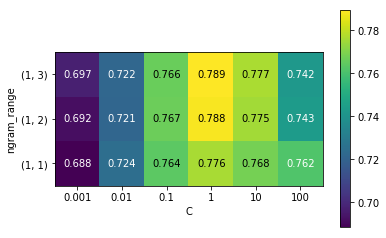

In [45]:
scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T
heatmap = mglearn.tools.heatmap( 
    scores, xlabel = "C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels = param_grid['logisticregression__C'],
    yticklabels = param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)
plt.show()

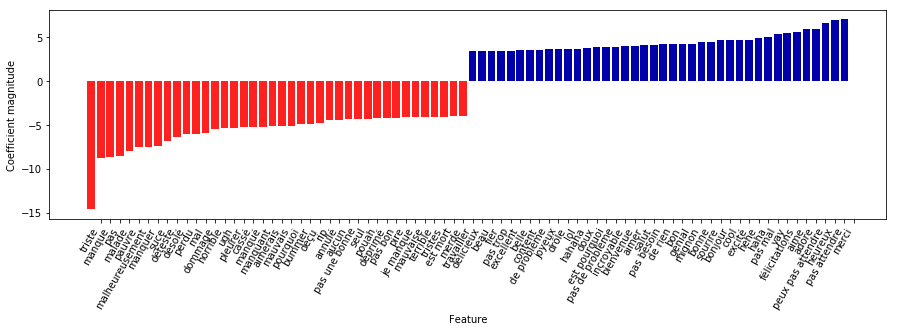

In [46]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

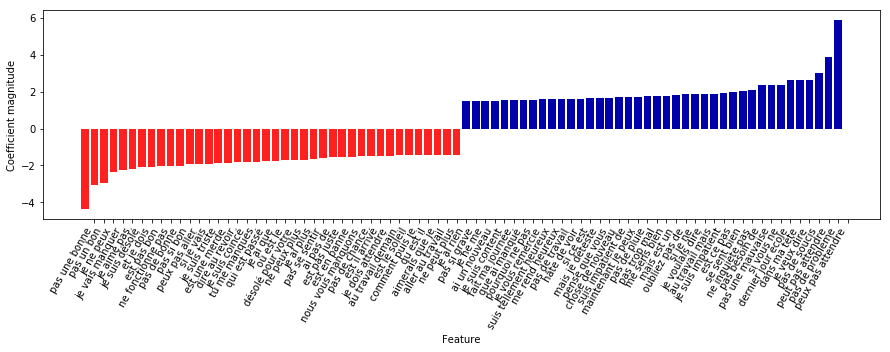

In [50]:
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=40)

# Lemmatisation

In [56]:
def custom_tokenizer(document):
    doc_spacy = nlp_fr(document)
    return [token.lemma_ for token in doc_spacy]

In [58]:
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (214185, 14732)
X_train.shape: (214185, 18169)


In [60]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=1)

grid.fit(X_train, y_train)
print("Best cross-validation score (standard CountVectorizer): {:.3f}".format(grid.best_score_))
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score (lemmatization): {:.3f}".format(grid.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.4min finished


Best cross-validation score (standard CountVectorizer): 0.773
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  6.1min finished


Best cross-validation score (lemmatization): 0.770


# Final test

In [89]:
def clean_text(document) :
    tokens = nltk.word_tokenize(document.lower())
    clean_tokens = [t for t in tokens if t not in string.punctuation]
    clean_text = ' '.join(clean_tokens)
    clean_text = clean_text.replace("``","")
    clean_text = clean_text.replace("''","")
    clean_text = clean_text.replace("quot","")
    clean_text = re.sub(' +', ' ', clean_text)
    lemma_tokens = [t.lemma_ for t in nlp_fr(clean_text)]
    return ' '.join(lemma_tokens)

In [90]:
%%time
text_train = [clean_text(x) for x in text_train]

CPU times: user 28min 31s, sys: 3.99 s, total: 28min 35s
Wall time: 28min 43s


In [91]:
%%time
text_test = [clean_text(x) for x in text_test]

CPU times: user 13min 46s, sys: 596 ms, total: 13min 47s
Wall time: 13min 50s


In [95]:
pipe = make_pipeline(TfidfVectorizer(min_df=5),
                     LogisticRegression(n_jobs=-1))

param_grid = {"logisticregression__C" : [1, 5, 10],
              "tfidfvectorizer__ngram_range" : [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=4)
grid.fit(text_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  7.2min finished


Best cross-validation score: 0.79
Best parameters:  {'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (1, 3)}


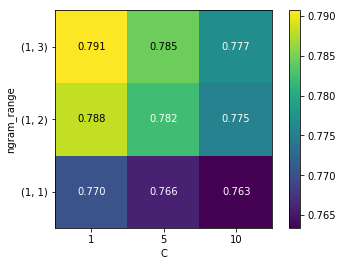

In [96]:
scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T

heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range", cmap="viridis",
                                fmt="%.3f", xticklabels = param_grid['logisticregression__C'],
                                yticklabels = param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)
plt.show()

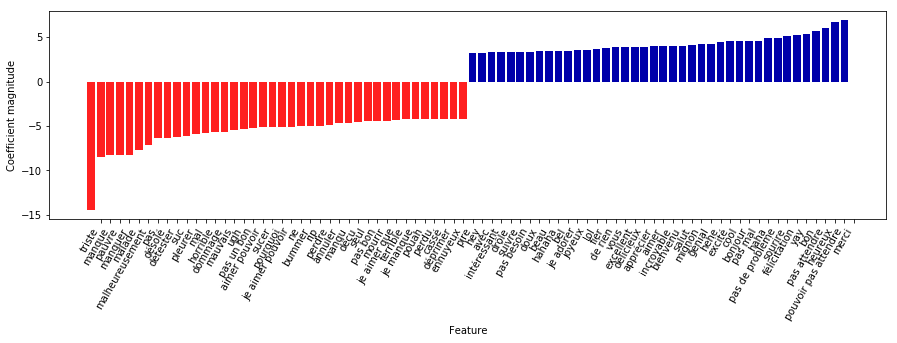

In [97]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

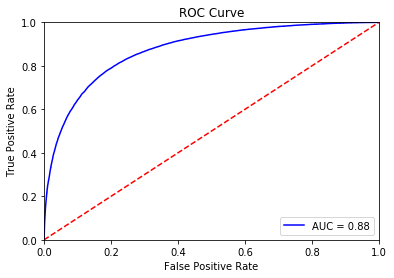

In [112]:
model = grid.best_estimator_ 
y_pred = model.predict(text_test)
probs = model.predict_proba(text_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

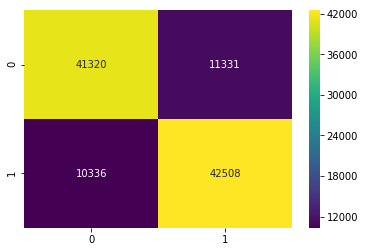

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     52651
           1       0.79      0.80      0.80     52844

   micro avg       0.79      0.79      0.79    105495
   macro avg       0.79      0.79      0.79    105495
weighted avg       0.79      0.79      0.79    105495

Accuracy on the test set: 0.79


In [114]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='2.0f', cmap="viridis")
plt.show()
print(classification_report(y_test,y_pred))
print("Accuracy on the test set: {:.2f}".format(accuracy_score(y_test, y_pred)))